# Проект - Восстановление золота из руды

## Описание проекта 

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.


## Описание данных

Данные находятся в трёх файлах:

- gold_industry_train.csv — обучающая выборка;
- gold_industry_test.csv — тестовая выборка;
- gold_industry_full.csv — исходные данные.

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Исходный датасет содержит обучающую и тестовую выборки со всеми признаками. В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.

Технологический процесс
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
- Xanthate — ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

Параметры этапов
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

Наименование признаков должно быть такое:
  [этап].[тип_параметра].[название_параметра]
  - Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Возможные значения для блока [тип_параметра]:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

## Расчёт эффективности

- Вам нужно смоделировать процесс восстановления золота из золотосодержащей руды.
- Эффективность обогащения рассчитывается по формуле

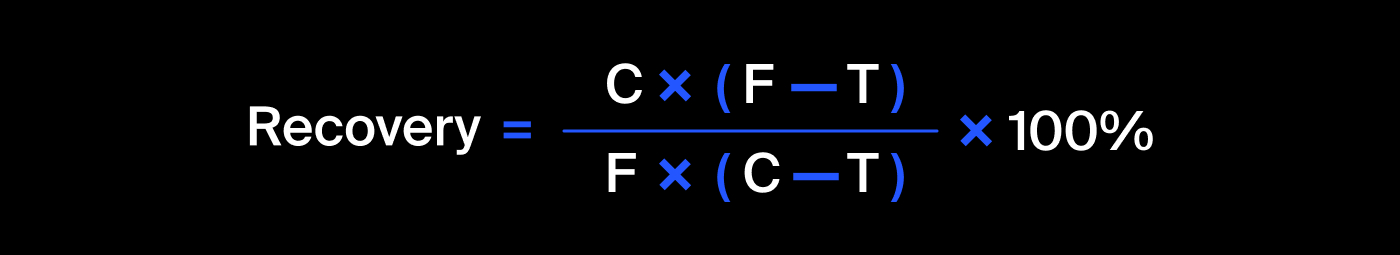
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

### Метрика качества

- Для решения задачи введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).
- Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных. Почему симметричная? Она одинаково учитывает масштаб и целевого признака, и предсказания.
- Метрика sMAPE вычисляется так:

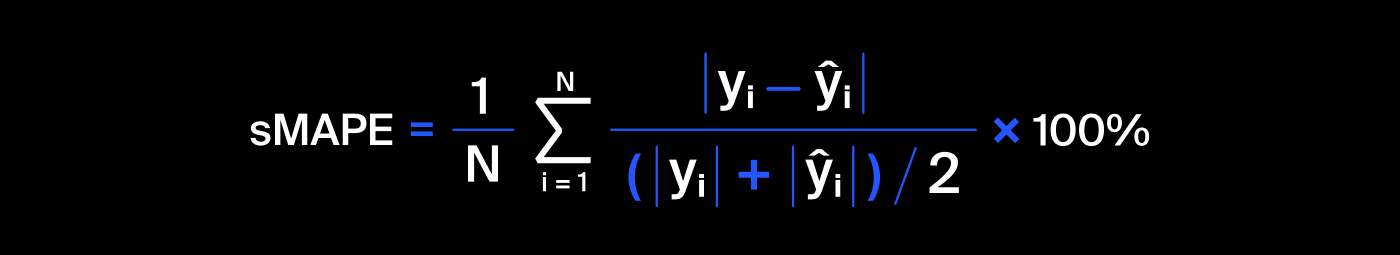


Обозначения:
- Yi - Значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество.
- ^Yi - Значение предсказания для объекта с порядковым номером i, например, в тестовой выборке.
- N - Количество объектов в выборке.
- Суммирование по всем объектам выборки (i меняется от 1 до N).

Нужно спрогнозировать сразу две величины:
- эффективность обогащения чернового концентрата rougher.output.recovery;
- эффективность обогащения финального концентрата final.output.recovery.

### Итоговая метрика складывается из двух величин:
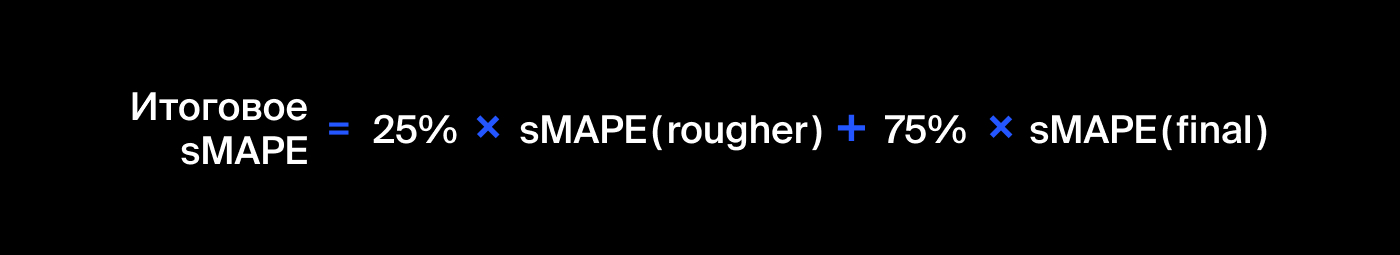


# Инструкция по выполнению проекта
1. Подготовьте данные
- 1.1. Откройте файлы и изучите их.
- 1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.
- 1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?
- 1.4. Проведите предобработку данных.
2. Проанализируйте данные
- 2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Какие особенности имеют распределения? Опишите выводы.
- 2.2.  Сравните распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
- 2.3. Исследуйте суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.
3. Постройте модель
- 3.1. Напишите функцию для вычисления итоговой sMAPE.
- 3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.dummy import DummyRegressor

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.set_option('max_columns', None) # показывать все столбцы df
pd.set_option('max_rows', None) # показывать все строки df

## 1.Подготовка данных

### 1.1. Откройте файлы и изучите их.

In [2]:
# загрузка данных и вывод первых пяти строк
data_train = pd.read_csv('gold_industry_train.csv')
data_train.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [3]:
# вывод последних пяти строк
data_train.tail()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
14574,2017-12-09 09:59:59,4.599524,5.822083,4.255546,37.480479,559.895089,85.247019,6.775864,9.005425,1200.454685,-300.012582,1150.627632,-500.007240,1052.213299,-499.814928,947.090150,-499.963329,850.209399,-499.970349,850.139876,-498.721100,6.775291,9.000862,48310.254419,2524.316705,2524.130891,1.080830,18.162221,11.351051,11.247837,29.858813,87.684717,0.728133,4.116153,0.618130,16.383667,125.423263,8.014263,6.5,1.338973,1648.628464,-400.254719,1649.423778,-399.892993,1648.461910,-400.079787,1649.980440,-399.801181,33.493651,6.372520,12.879280,7.756028,2.581269,22.974292,6.868943,4.315335,35.096512,-501.110562,29.933276,-500.291576,25.996427,-500.158269,23.033562,-499.972253,23.030949,-501.196721,20.034440,-499.842047,18.001504,-499.872052,12.998309,-500.027809,20.007108,-500.850685,0.0,0.0,0.0,0.0,47.765393,2.925574,10.855586,7.053796,64.054699,1.761994,8.578502,3.365823,10.603464
14575,2017-12-09 10:59:59,4.658125,5.844800,4.241564,37.395565,561.464855,83.860651,6.770561,9.000889,1200.958146,-300.013649,1149.862859,-499.856868,1049.476804,-500.085763,9

In [4]:
# общая информация о df
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [5]:
data_train.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14150.000000,14579.000000,14579.000000,14579.000000,14543.000000,14172.000000,1.457800e+04,14578.000000,14578.000000,14579.000000,14579.000000,14579.000000,14579.000000,14561.000000,14579.000000,14579.000000,14578.000000,14579.000000,14579.000000,14556.000000,14551.000000,14579.000000,14518.000000,1.457600e+04,14579.000000,1.457600e+04,14579.000000,1.457900e+04,14579.000000,1.457800e+04,14579.000000,14579.000000,14579.000000,14491.000000,14314.000000,14579.000000,14575.000000,14573.000000,14534.000000,14485.000000,14579.000000,14557.000000,14579.000000,14567.000000,14579.000000,14579.000000,14579.000000,14574.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14578.000000,14579.000000,14579.000000,14578.000000,14575.000000,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579

In [6]:
# информация по количеству пропусков в признаке в процентах, где пропуско больше 1% от количества записей 
(data_train.isna().mean()*100)[data_train.isna().mean() * 100 > 0]

rougher.input.feed_pb                                 0.493861
rougher.input.feed_sol                                0.528157
rougher.input.feed_rate                               0.048014
rougher.input.feed_size                               0.692777
rougher.input.floatbank10_sulfate                     0.212635
rougher.input.floatbank10_xanthate                    0.048014
rougher.state.floatbank10_e_air                       2.942589
rougher.input.floatbank11_sulfate                     0.246931
rougher.input.floatbank11_xanthate                    2.791687
rougher.calculation.sulfate_to_au_concentrate         0.006859
rougher.calculation.floatbank10_sulfate_to_au_feed    0.006859
rougher.calculation.floatbank11_sulfate_to_au_feed    0.006859
rougher.output.concentrate_sol                        0.123465
rougher.output.tail_ag                                0.006859
primary_cleaner.input.sulfate                         0.157761
primary_cleaner.input.depressant                      0

In [7]:
# проверка на явные дубликаты объектов
data_train.duplicated().sum()

0

In [8]:
# проверка на скрытые дубликаты по колонке date
data_train['date'].duplicated().sum()

0

In [9]:
data_test = pd.read_csv('gold_industry_test.csv')
data_test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.500000,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.831890,-400.586116,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,98.880538,7.984164,6.500000,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,1049.182824,-500.014696,948.085464,-499.997003,850.170086,-500.270334,849.557905,-500.198702,7.358308,9.000624,119.497545,8.003752,6.500000,1.259741,1647.368779,-399.788506,1648.395206,-400.166490,1648.953828,-400.468641,1649.821569,-400.071884,34.952967,-501.204647,29.927025,-500.106628,25.978253,-499.890060,23.004376,-500.014529,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,1152.512559,-500.338106,1052.601592,-499.695075,955.171539,-500.294989,851.957342,-499.779541,850.765662,-501.030559,6.929364,8.920717,108.080163,7.970121,6.660000,0.774909,1652.660845,-399.702218,1651.203128,-400.291472,1651.924848,

In [10]:
data_test.tail()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
4855,2018-08-18 06:59:59,6.620245,5.992592,2.589242,39.934641,578.654582,63.473450,14.688804,6.898599,999.688257,-399.217124,1600.278420,-450.107091,1599.737339,-448.396498,1598.207230,-450.370000,1396.848252,-458.073441,1397.977965,-442.705181,14.676690,6.903515,150.944211,12.516814,7.25,1.005121,1599.713324,-500.811273,1596.499220,-499.189257,1599.635875,-500.178569,1598.888237,-499.112223,26.008972,-500.410938,24.075851,-499.647030,23.969678,-500.207930,23.978896,-499.862885,14.003057,-503.152258,12.016724,-501.136446,10.041864,-499.338844,8.007022,-500.279583,14.001271,-602.072365
4856,2018-08-18 07:59:59,6.741324,6.158617,2.647185,40.176307,571.622005,62.815291,14.892720,6.903204,1000.479783,-399.574748,1600.585419,-450.871865,1600.054220,-451.892850,1604.245003,-450.784204,1397.507497,-452.207181,1398.025205,-451.184768,14.838200,6.894752,147.591165,12.517364,7.25,0.959430,1602.999120,-500.526448,1597.866105,-499.798253,1598.796914,-498.214347,1597.075286,-499.158291,26.019475,-499.818693,23.991310,-500.888315,24.026801,-499.856287,23.959707,-500.428539,14.031220,-503.471307,11.966426,-500.656842,10.051620,-498.318772,8.018091,-499.696138,13.958937,-599.213013
4857,2018-08-18 08:59:59,6.627458,6.015149,2.466127,39.841423,563.733146,61.287347,13.723692,6.700148,1000.014718,-400.320877,1600.572169,-449.351989,1601.079206,-450.846324,1597.862670,-449.053827,1400.353257,-448.866374,1399.930779,-449.388880,13.716111,6.703495,144.447728,12.499446,7.25,0.904020,1596.610313,-499.416573,1597.325921,-499.944194,1601.441880,-499.658913,1599.758645,-501.149616,25.953364,-501.033038,24.039465,-500.088979,24.010117,-499.705384,24.024501,-499.466383,13.996317,-502.995300,11.980055,-500.607751,9.964501,-499.261719,8.065048,-499.492395,13.997801,-600.621416
4858,2018-08-18 09:59:59,6.702243,6.097592,2.278955,37.728375,549.812490,59.637037,13.746510,6.706417,999.635748,-399.484884,1599.852212,-449.448826,1599.325946,-448.812166,1614.612892,-449.774665,1401.626496,-447.607440,1400.158685,-448.035466,13.758277,6.702969,147.944885,12.481529,7.25,0.893913,1603.053015,-499.728573,1600.537532,-500.0960

In [11]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [12]:
data_test.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4860.000000,4860.000000,4853.000000,4860.000000,4860.000000,4860.000000,4852.000000,4814.000000,4859.000000,4851.000000,4860.000000,4817.000000,4859.000000,4859.000000,4859.000000,4859.000000,4858.000000,4859.000000,4858.000000,4859.000000,4734.000000,4859.000000,4859.000000,4859.000000,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,1312.346061,-472.506533,1291.638282,-472.902514,1204.066585,-473.380689,1075.304980,-471.465792,1023.769668,-471.412834,11.969074,6.119323,143.201672,8.692446,7.305514,1.007577,1588.387039,-488.223175,1589.297134,-490.255893,1588.905465,-489.741555,1530.287801,-485.896489,29.488451,-499.504602,24.732293,-499.556727,2.889647e+01,-489.475315,2.263273e+01,-494.765779,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,159.001709,49.376824,180.203670,47.611728,184.547737,47.828848,159.989533,51.413832,147.827669,51.838763,3.456113,1.049065,42.360060,3.169592,0.588602,0.494669,124.942960,36.672631,132.102797,35.203702,132.689236,33.650676,256.268884,43.296128,5.357783,43.284386,5.484220,43.619785,6.159087e+00,51.827314,5.456797e+00,40.681493,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,767.656587,-649.997496,831.537936,-552.657032,706.281918,-648.118446,695.211786,-598.926149,539.633937,-649.376184,0.000163,0.002616,7.329299,0.000000,4.970000,0.000154,314.241165,-653.477578,319.959489,-799.260788,273.536823,-709.213816,131.321672,-799.791618,0.122013,-799

In [13]:
# информация по количеству пропусков в признаке в %, где это значение больше 1% от количества записей 
(data_test.isna().mean()*100)[data_test.isna().mean() * 100 > 0]

rougher.input.feed_pb                         0.576132
rougher.input.feed_sol                        0.452675
rougher.input.feed_rate                       0.082305
rougher.input.feed_size                       0.905350
rougher.input.floatbank10_sulfate             0.061728
rougher.input.floatbank10_xanthate            0.020576
rougher.state.floatbank10_a_air               0.020576
rougher.state.floatbank10_a_level             0.020576
rougher.state.floatbank10_b_air               0.020576
rougher.state.floatbank10_b_level             0.020576
rougher.state.floatbank10_c_air               0.020576
rougher.state.floatbank10_c_level             0.020576
rougher.state.floatbank10_e_air               0.144033
rougher.input.floatbank11_sulfate             0.164609
rougher.input.floatbank11_xanthate            0.946502
primary_cleaner.input.sulfate                 0.020576
primary_cleaner.input.depressant              0.185185
primary_cleaner.input.xanthate                0.884774
primary_cl

In [14]:
data_test.duplicated().sum()

0

In [15]:
data_test['date'].duplicated().sum()

0

In [16]:
data_full = pd.read_csv('gold_industry_full.csv')
data_full.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [17]:
data_full.tail()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
19434,2018-08-18 06:59:59,6.620245,5.992592,2.589242,39.934641,578.654582,63.473450,14.688804,6.898599,999.688257,-399.217124,1600.278420,-450.107091,1599.737339,-448.396498,1598.207230,-450.370000,1396.848252,-458.073441,1397.977965,-442.705181,14.676690,6.903515,42054.384954,3499.600613,3499.494045,2.556827,18.470301,11.039123,7.405501,25.960548,85.462226,1.387434,4.949871,0.754358,20.634540,150.944211,12.516814,7.25,1.005121,1599.713324,-500.811273,1596.499220,-499.189257,1599.635875,-500.178569,1598.888237,-499.112223,22.132642,5.775645,7.112666,12.377102,2.020822,15.316786,2.843019,7.608820,26.008972,-500.410938,24.075851,-499.647030,23.969678,-500.207930,23.978896,-499.862885,14.003057,-503.152258,12.016724,-501.136446,10.041864,-499.338844,8.007022,-500.279583,14.001271,-602.072365,2.073936,12.740218,4.460185,10.013738,42.435181,5.719113,10.621027,6.459561,68.786981,2.314786,10.286797,1.171459,19.131121
19435,2018-08-18 07:59:59,6.741324,6.158617,2.647185,40.176307,571.622005,62.815291,14.892720,6.903204,1000.479783,-399.574748,1600.585419,-450.8718

In [18]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


In [19]:
data_full.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19395.000000,18986.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,19439.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439

In [20]:
# информация по количеству пропусков в признаке в %, где это значение больше 1% от количества записей 
(data_full.isna().mean()*100)[data_full.isna().mean() * 100 > 0]

rougher.input.feed_pb                                 0.514430
rougher.input.feed_sol                                0.509285
rougher.input.feed_rate                               0.056587
rougher.input.feed_size                               0.745923
rougher.input.floatbank10_sulfate                     0.174906
rougher.input.floatbank10_xanthate                    0.041154
rougher.state.floatbank10_a_air                       0.005144
rougher.state.floatbank10_a_level                     0.005144
rougher.state.floatbank10_b_air                       0.005144
rougher.state.floatbank10_b_level                     0.005144
rougher.state.floatbank10_c_air                       0.005144
rougher.state.floatbank10_c_level                     0.005144
rougher.state.floatbank10_e_air                       2.242914
rougher.input.floatbank11_sulfate                     0.226349
rougher.input.floatbank11_xanthate                    2.330367
rougher.calculation.sulfate_to_au_concentrate         0

In [21]:
data_full.duplicated().sum()

0

In [22]:
data_full['date'].duplicated().sum()

0

**Итоги, выводы  п.1.1**
- загружены, изучены данные, выведена информацию о пяти первых и последних строках для оценки визуально
- выведена общая информация по df 
- выведена информация по количеству пропусков в признаках 
- сделана проверка на явные дубликаты по объектам и на не явные по строке date

информация по df:
- df train 14 579 записей, 87 колонок
- df test 4 860 записей, 53 колонок
- df full 19 439 записей, 87 колонок
- информация о пропущеных параметрах в data_test ниже

данные в df:
- первая колонка это дата и время осуществления технологической операции
- колонки (признаки) это название данных, оценки состояния процесса, расчетные данные, которые используется последовательно в технологическом процессе на различных этапах обагащения: Флотация, Первый этап очистки, Второй этап очистки 
- записи в строках это количественные данные по технологическому процессу на различных этапах обогащения: Флотация, Первый этап очистки, Второй этап очистки 
- данные состоят из входных, выходных значений концентрации металлов в продуктах переработке, хвостах, а также данные других химических продуктов которые участвуют в обогащении и технологических покаателей на этапах обогащения



### 1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

сделаем проверку эффективности формулы обогащения на признаке rougher.output.recovery и на final.output.recovery

т.к. значение data_train['rougher.output.concentrate_au']  и data_train['final.output.concentrate_au'] 
в ряде строк равно нулю, это не даст правильно расчитать значение recovery, поэтому предварительно посмотрим сколько этих значений  равны 0, если небольшое количество, то удалим эти значения

In [23]:
# вывод количества значений data_train['rougher.output.concentrate_au'] = 0
data_train[data_train['rougher.output.concentrate_au'] == 0].shape[0]

394

In [24]:
data_train[data_train['final.output.concentrate_au'] == 0].shape[0]

98

In [25]:
# удалим из df значениz data_train['rougher.output.concentrate_au'] = 0
data_train = data_train.drop(data_train[data_train['rougher.output.concentrate_au'] == 0].index).reset_index(drop=True)
data_train = data_train.drop(data_train[data_train['final.output.concentrate_au'] == 0].index).reset_index(drop=True)

In [26]:
# функция расчета recovery
def calculate_recovery(df, C, F, T):
    """
    C — доля золота в концентрате после флотации/очистки -  название признака в df - str;
    F — доля золота в сырье/концентрате до флотации/очистки  - название признака в df - str;
    T — доля золота в отвальных хвостах после флотации/очистки - название признака в df - str;
    """
    recovery = []
    for i in range(0, len(df)):
        x = df.loc[i, C] * (df.loc[i, F] - df.loc[i, T])
        y = df.loc[i, F] * (df.loc[i, C] - df.loc[i, T])

        recovery.append(x / y * 100)
        
    return pd.Series(recovery)

In [27]:
data_train['rougher.output.recovery_n'] = calculate_recovery(data_train, 'rougher.output.concentrate_au', 
                                                                    'rougher.input.feed_au', 'rougher.output.tail_au')

In [28]:
data_train['final.output.recovery_n'] = calculate_recovery(data_train, 'final.output.concentrate_au', 
                                                               'rougher.output.concentrate_au', 'final.output.tail_au')

In [29]:
# сравние значений recovery: фактических и расчитанных
data_train[['rougher.output.recovery','rougher.output.recovery_n', 'final.output.recovery', 
                                                                                   'final.output.recovery_n']].head()

,rougher.output.recovery,rougher.output.recovery_n,final.output.recovery,final.output.recovery_n
0,87.107763,87.107763,70.541216,93.944554
1,86.843261,86.843261,69.266198,93.790501
2,86.842308,86.842308,68.116445,93.509750
3,87.226430,87.226430,68.347543,93.595268
4,86.688794,86.688794,66.927016,93.811976


In [30]:
# вывод средних значений значений rougher.output.recovery: фактических и расчитанных
print(data_train['rougher.output.recovery'].mean())
print(data_train['rougher.output.recovery_n'].mean())

84.870669557566
84.87066955756603


In [31]:
# расчет MAE на rougher.output.recovery
MAE_rougher_output_recovery = mean_absolute_error(data_train['rougher.output.recovery'], 
                                                  data_train['rougher.output.recovery_n'])
print(MAE_rougher_output_recovery)

1.0105023181731271e-14


In [32]:
# вывод средних значений значений final.output.recovery: фактических и расчитанных
print(data_train['final.output.recovery'].mean())
print(data_train['final.output.recovery_n'].mean())

67.29222001105516
91.18613228444146


In [33]:
# расчет MAE на final.output.recovery
MAE_rougher_output_recovery = mean_absolute_error(data_train['final.output.recovery'], data_train['final.output.recovery_n'])
print(MAE_rougher_output_recovery)

23.908846162551917


**Итоги, выводы  п.1.2**
- на обучающей выборке сделан расчет для признака 'rougher.output.recovery' (колонка data_train['rougher.output.recovery_n'])
- данные в столбцах data_train['rougher.output.recovery'] и data_train['rougher.output.recovery_n']) - одинаковы
- MAE = 0 ( на уровне погрешности вывода чисел с плавающей запятой в Python) 

доп. оценка
- данные в столбцах data_train['final.output.recovery'] и data_train['final.output.recovery_n']) - разные

In [34]:
data_train = data_train.drop(['rougher.output.recovery_n', 'final.output.recovery_n'], axis=1)

### 1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [35]:
pd.Series(data_train.dtypes)[~data_train.columns.isin(data_test.columns)]

rougher.calculation.sulfate_to_au_concentrate         float64
rougher.calculation.floatbank10_sulfate_to_au_feed    float64
rougher.calculation.floatbank11_sulfate_to_au_feed    float64
rougher.calculation.au_pb_ratio                       float64
rougher.output.concentrate_au                         float64
rougher.output.concentrate_ag                         float64
rougher.output.concentrate_pb                         float64
rougher.output.concentrate_sol                        float64
rougher.output.recovery                               float64
rougher.output.tail_au                                float64
rougher.output.tail_ag                                float64
rougher.output.tail_pb                                float64
rougher.output.tail_sol                               float64
primary_cleaner.output.concentrate_au                 float64
primary_cleaner.output.concentrate_ag                 float64
primary_cleaner.output.concentrate_pb                 float64
primary_

print(data_train.columns[~data_train.columns.isin(data_test.columns)])

**Информация, выводы  п.1.3**
- признаки, которых нет в тестовой выборке в основном относятся к данным выхода концентрация металлов Au, Ag, Pb, и вещества Sol в концентрах (целевых продуктов переработки) и в хвостах на различных стадиях обработки сырья: Флотация, Первый этап очистки, Второй этап очистки 
- тип данных количественный - float64
- это выходные (output) и расчетные (calculation) характеристики, их нельзя использовать при обучении, так как они еще не будут доступны к моменту начала процесса

### 1.4. Проведите предобработку данных.

Анализ по пропущеным значениям:
- количество пропущеных значений в отдельности по признакам небольшое, в основном менее 1%, несколько признаков имеет пропуски 2-3% от общего кличество записей;
- также не все пропущеные значения имеют значение для расчета прогнозов по модели

Решение на данный момент:
- заменим пропущеные значения на предпоследние значения признака методом .ffill()

In [36]:
data_train = data_train.ffill(axis=0)      
print(data_train.isna().sum().sum(), data_train.shape)

0 (14089, 87)


In [37]:
data_test = data_test.ffill(axis=0) 
print(data_test.isna().sum().sum(), data_test.shape)

0 (4860, 53)


In [38]:
data_full = data_full.ffill(axis=0) 
print(data_full.isna().sum().sum(), data_full.shape)

0 (19439, 87)


In [39]:
print(data_train.shape, data_test.shape, data_full.shape)

(14089, 87) (4860, 53) (19439, 87)


**Итоги, выводы  п.1**
- загрузили, изучили данные
- явных дубликатов нет
- дубликтов по датам и времени операций нет
- заменили пропущенные значения в признаках на предпоследние значения по признаку

## 2.Анализ данных

#### 2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Какие особенности имеют распределения? Опишите выводы.
- Au - золото
- Ag - серебро
- Pb - свинец

In [40]:
# сформируем списки с названием необходимых признаков
au_output_list = []
ag_output_list = []
pb_output_list = []
for i in data_train.columns:
    if 'feed_au' in i or 'concentrate_au' in i or 'tail_au' in i:
        au_output_list.append(i)
    elif 'feed_ag' in i or 'concentrate_ag' in i or 'tail_ag' in i:
        ag_output_list.append(i)
    elif 'feed_pb' in i or 'concentrate_pb' in i or 'tail_pb' in i:
        pb_output_list.append(i)

au_output_list

['rougher.input.feed_au',
 'rougher.output.concentrate_au',
 'rougher.output.tail_au',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_au',
 'final.output.concentrate_au',
 'final.output.tail_au']

In [41]:
# выведем медианные значения признаков для золота
for i in au_output_list:        
    print(f'{i:<40}={round(data_train[i].median(),2):>5}') 

rougher.input.feed_au                   = 8.22
rougher.output.concentrate_au           =20.39
rougher.output.tail_au                  = 1.83
primary_cleaner.output.concentrate_au   =32.78
primary_cleaner.output.tail_au          = 3.66
secondary_cleaner.output.tail_au        = 4.07
final.output.concentrate_au             =44.97
final.output.tail_au                    = 3.01


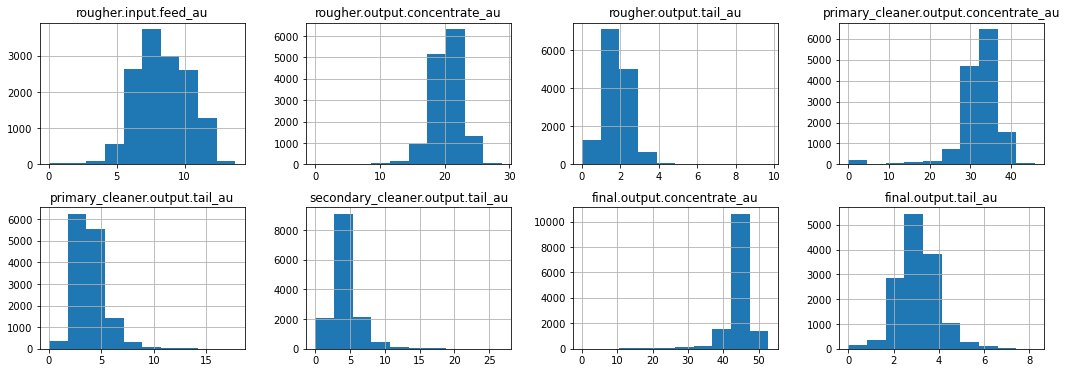

In [42]:
# построим гистограммы признаков для золота
data_train[au_output_list].hist(figsize=(18,6), layout=(2,4));

In [43]:
# выведем медианные значения признаков для серебра
for i in ag_output_list:        
    print(f'{i:<40}-{round(data_train[i].median(),2):>5}') 

rougher.input.feed_ag                   - 8.72
rougher.output.concentrate_ag           -12.24
rougher.output.tail_ag                  - 5.81
primary_cleaner.output.concentrate_ag   - 8.58
primary_cleaner.output.tail_ag          -15.76
secondary_cleaner.output.tail_ag        -15.48
final.output.concentrate_ag             - 5.14
final.output.tail_ag                    - 9.84


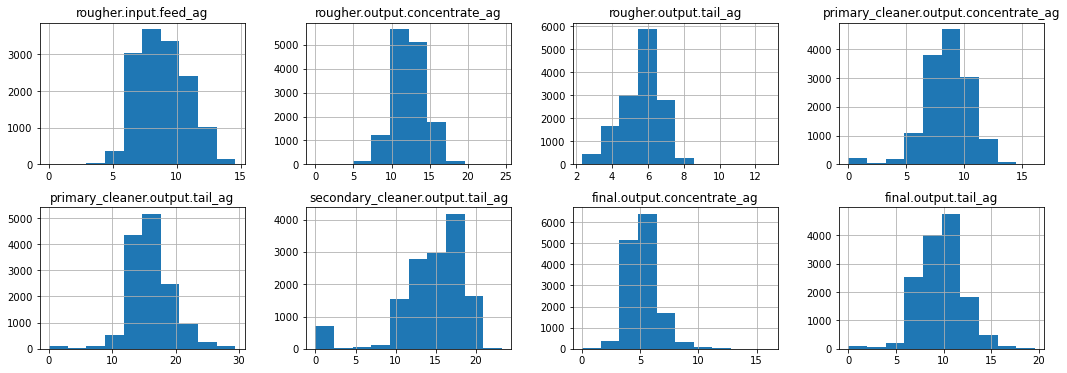

In [44]:
# построим гистограммы признаков для серебра
data_train[ag_output_list].hist(figsize=(18,6), layout=(2,4));

In [45]:
# выведем медианные значения признаков для свинца
for i in pb_output_list:        
    print(f'{i:<40}-{round(data_train[i].median(),2):>5}') 

rougher.input.feed_pb                   - 3.52
rougher.output.concentrate_pb           - 7.74
rougher.output.tail_pb                  - 0.62
primary_cleaner.output.concentrate_pb   - 10.1
primary_cleaner.output.tail_pb          - 3.22
secondary_cleaner.output.tail_pb        - 5.21
final.output.concentrate_pb             -10.06
final.output.tail_pb                    - 2.76


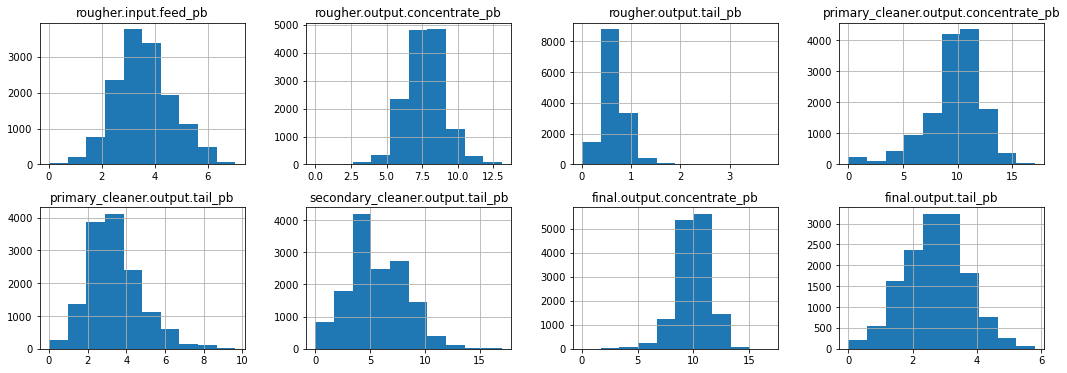

In [46]:
# построим гистограммы признаков для свинца
data_train[pb_output_list].hist(figsize=(18,6), layout=(2,4));

**Информация, выводы  п.2.1**
- выведены медианные значения и построены гистограмм призанаков с концентрацией  металлов  (Au, Ag, Pb)  в сырье, в черновом концентрате, в концентрате после первой, второй очистки и в финальном концентрате, а также в хвостах

Золото:
- концентрация золота растет и в концентратах и в хвостах
- распределение признаков нормальное, есть незначительные выбросы

Серебро:
- концентрация серебра снала растет и в концентратах и в хвостах, но в финальных значения значительно падает
- распределение признаков нормальное, есть незначительные выбросы   

Свинец:
- концентрация свинца снала растет, но после 'primary_cleaner' остается на одном уровне, в хвостах в финальной оценке падает
- распределение признаков нормальное, выбросов практически нет


#### 2.2.  Сравните распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

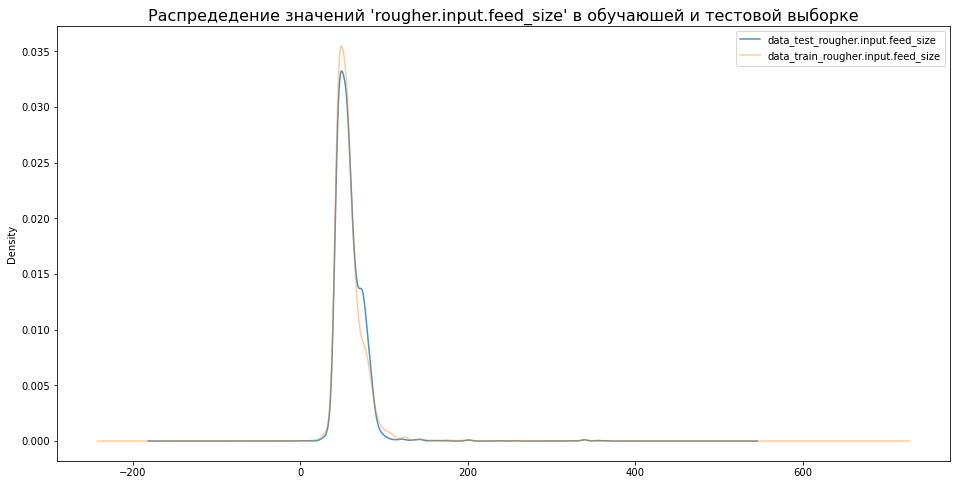

In [47]:
# распредедение значений 'rougher.input.feed_size' в обучаюшей и тестовой выборке
ax = data_test.plot(kind='kde', y='rougher.input.feed_size', alpha=0.8, label='data_test_rougher.input.feed_size');
data_train.plot(kind='kde', y='rougher.input.feed_size', ax=ax, alpha=0.4, label='data_train_rougher.input.feed_size', 
                                                                                    legend=True, figsize=(16,8));
plt.title("Распредедение значений 'rougher.input.feed_size' в обучаюшей и тестовой выборке", fontsize=16)
plt.show()

In [48]:
data_train['rougher.input.feed_size'].describe()

count    14089.000000
mean        59.120493
std         23.017409
min          0.049194
25%         47.347680
50%         54.544234
75%         64.441364
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [49]:
data_test['rougher.input.feed_size'].describe()

count    4860.000000
mean       59.136150
std        19.512497
min         0.046369
25%        47.610795
50%        55.461058
75%        66.538910
max       363.989699
Name: rougher.input.feed_size, dtype: float64

**Информация, выводы  п.2.2**
- распределение значений 'rougher.input.feed_size' в обучаюшей и тестовой выборке практически одинаковы и распределены нормально
- медианы 53.14 и 55.22 соответственно
- межквартильный размах (46.73, 61.45) и (47.58, 65.81) соответственно

#### 2.3. Исследуйте суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

In [50]:
au_concentrate_list = [i for i in au_output_list if 'tail' not in i]
ag_concentrate_list = [i for i in ag_output_list if 'tail' not in i]
pb_concentrate_list = [i for i in pb_output_list if 'tail' not in i]
pb_concentrate_list

['rougher.input.feed_pb',
 'rougher.output.concentrate_pb',
 'primary_cleaner.output.concentrate_pb',
 'final.output.concentrate_pb']

In [51]:
data_train[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum().sum()

293115.45782446617

In [52]:
au_ag_pb_concentrate_dict = {}
for i in zip(au_concentrate_list, ag_concentrate_list, pb_concentrate_list):
    print(f"{i[0]+'_ag_pb':<45} - {round(data_train[list(i)].sum().sum(),2): >10}")
    au_ag_pb_concentrate_dict[i[0]+'_ag_pb'] = (round(data_train[list(i)].sum().sum(),2))
   

rougher.input.feed_au_ag_pb                   -  293115.46
rougher.output.concentrate_au_ag_pb           -  567016.72
primary_cleaner.output.concentrate_au_ag_pb   -  707199.27
final.output.concentrate_au_ag_pb             -  838037.64


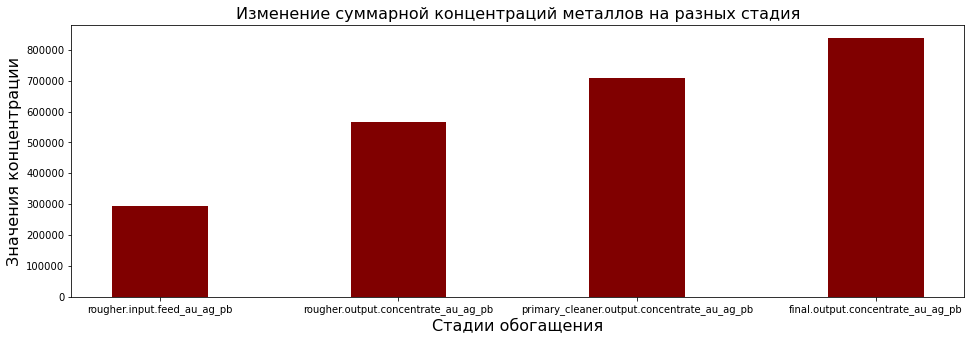

In [53]:
keys = list(au_ag_pb_concentrate_dict.keys())
values = list(au_ag_pb_concentrate_dict.values())
fig = plt.figure(figsize = (16, 5))
plt.bar(keys, values, color ='maroon', width = 0.4)
plt.xlabel("Стадии обогащения", size=16)
plt.ylabel("Значения концентрации", size=16)
plt.title("Изменение суммарной концентраций металлов на разных стадия", size=16)

plt.show()

**Информация, выводы  п.2.3**
- Cуммарная концентрация металлов последовательно растет на стадия обогащения

# 3. Постройте модель

3.1. Напишите функцию для вычисления итоговой sMAPE.

3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

In [54]:
# функция расчет sMAPE  

def calculation_smape(target, predict):
    """
    sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»)
    параметры функции:
        target - фактическое значение целевого признака, название признака в df
        predict - предсказаное значение целевого признака, название признака в df
    """
    x = np.abs(target - predict)
    y = (np.abs(target) + np.abs(predict)) / 2 

    return 1 / len(target) * np.sum(x / y) * 100 

In [55]:
# функция  расчет комплексного sMAPE 

def total_smape(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

In [56]:
# используя библиотечну фцнкцию make_scorer() сделаем scorer для моделей 
smape_scorer = make_scorer(calculation_smape, greater_is_better=False)

# подготовим данные features и target
- сократил данные до данных со значением input, т.к. они наиболее значимо коррелируеют с таргетом

In [57]:
# признаки со значением input
list_data_features = [i for i in data_test.columns if 'input' in i]
list_data_features

['rougher.input.feed_au',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate']

In [58]:
# data_train features
data_train_recovery_features = data_train[list_data_features]
data_train_recovery_features.shape

(14089, 14)

In [59]:
# target для стадии rougher
data_train_recovery_rougher_target = data_train['rougher.output.recovery']
data_train_recovery_rougher_target.shape

(14089,)

In [60]:
# target для стадии final
data_train_recovery_final_target = data_train['final.output.recovery']
data_train_recovery_final_target.shape

(14089,)

### Обучение и расчет sMAPE на модели LinearRegression() через библиотечную функцию cross_val_score()

In [61]:
model_LR = LinearRegression()

# расчет smape на стадии rougher
smape_rougher_LR = abs(cross_val_score(model_LR, data_train_recovery_features, data_train_recovery_rougher_target, 
                                                                                        scoring=smape_scorer, cv=3).mean())

# расчет smape на стадии final
smape_final_LR = abs(cross_val_score(model_LR, data_train_recovery_features, data_train_recovery_final_target, 
                                                                                        scoring=smape_scorer, cv=3).mean())

In [62]:
# итоговое smape для LinearRegression
smape_total_LR = total_smape(smape_rougher_LR, smape_final_LR)
print('итоговая оценка sMAPE на модели LinearRegression() - ', smape_total_LR)

итоговая оценка sMAPE на модели LinearRegression() -  9.274693422598585


### Обучение и расчет sMAPE на модели RandomForestRegressor() методом GridSearchCV

In [63]:
grid_RFR = GridSearchCV(RandomForestRegressor(random_state=12345), {
                'max_depth': [1, 2, 3, 4, 5, 6, 7, 8], 
                'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80], 
                }, 
                cv = 4, 
                scoring = smape_scorer)

In [64]:
grid_RFR_rougher = grid_RFR.fit(data_train_recovery_features, data_train_recovery_rougher_target)

In [65]:
# вывод параметров лучшей модели
grid_RFR_rougher.best_estimator_ 

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=12345)

In [66]:
# sMAPE на этапе rougher
score_grid_RFR_rougher = abs(grid_RFR_rougher.best_score_)
score_grid_RFR_rougher

7.070869708624546

In [67]:
grid_RFR_final = grid_RFR.fit(data_train_recovery_features, data_train_recovery_final_target)

In [68]:
# вывод параметров лучшей модели
grid_RFR_final.best_estimator_ 

RandomForestRegressor(max_depth=2, n_estimators=20, random_state=12345)

In [69]:
# sMAPE на этапе final
score_grid_RFR_final = abs(grid_RFR_final.best_score_)
score_grid_RFR_final

8.913647613719503

In [70]:
# итоговое smape для RandomForestRegressor
smape_total_RFR = total_smape(score_grid_RFR_rougher, score_grid_RFR_final)
print('Итоговая smape на модели RandomForestRegressor() - ', smape_total_RFR)

Итоговая smape на модели RandomForestRegressor() -  8.452953137445764


### Проверка лучшей модели на тестовой выборке и data_full

**подготовим данные features и target**

In [71]:
# features
data_test_recovery_features = data_test[list_data_features]
data_test_recovery_features.shape

(4860, 14)

In [72]:
# внесем в data_test значения target из data_full -'rougher.output.recovery','final.output.recovery' -чтобы совместить значения по дате
data_test = data_test.merge(data_full.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

In [73]:
# target для стадии rougher из data_full
data_test_recovery_rougher_target = data_test['rougher.output.recovery']
data_test_recovery_rougher_target.shape

(4860,)

In [74]:
# target для стадии final из data_full
data_test_recovery_final_target = data_test['final.output.recovery']
data_test_recovery_final_target.shape

(4860,)

**обучение, предсказание и расчет smape**

In [83]:
# расчета для data_test на стадии rougher
grid_RFR_rougher.best_estimator_.fit(data_train_recovery_features, data_train_recovery_rougher_target)
predict_rougher = grid_RFR_rougher.best_estimator_.predict(data_test_recovery_features)

smape_test_rougher = abs(calculation_smape(data_test_recovery_rougher_target, predict_rougher))

In [84]:
# расчета для data_test на стадии fianl
grid_RFR_final.best_estimator_.fit(data_train_recovery_features, data_train_recovery_final_target)
predict_final = grid_RFR_final.best_estimator_.predict(data_test_recovery_features)

smape_test_final = abs(calculation_smape(data_test_recovery_final_target, predict_final))

In [85]:
# итоговое smape для data_test
smape_total_test = total_smape(smape_test_rougher, smape_test_final)
smape_total_test

7.733676312611574

### Сравним итоговое smape со значение smape на константной модели DummyRegressor

In [86]:
# расчет на стадии rougher
dummy_rougher = DummyRegressor(strategy="mean")
dummy_rougher.fit(data_train_recovery_features, data_train_recovery_rougher_target)
dummy_predicted_rougher = dummy_rougher.predict(data_test_recovery_features)

smape_dummy_rougher = abs(calculation_smape(data_test_recovery_rougher_target, dummy_predicted_rougher))

In [87]:
# расчет на стадии final
dummy_final = DummyRegressor(strategy="mean")
dummy_final.fit(data_train_recovery_features, data_train_recovery_final_target)
dummy_predicted_final = dummy_rougher.predict(data_test_recovery_features)
smape_dummy_final = abs(calculation_smape(data_test_recovery_final_target, dummy_predicted_final))


In [88]:
smape_dummy_total = total_smape(smape_dummy_rougher, smape_dummy_final)
smape_dummy_total

18.893223448694155

# Общие итоги:
- даные загружены, изучены, предобработаны
- выполенены задачи по пунктам:
    - составлены необходимые функции
    - построены модели
    - сделаны предсказания для rougher.output.recovery и final.output.recovery
    - методом cross_val_score  выбрана лучшая модель 
- расчитанно итоговое sMAPE на data_train,  на кросс-валидации с 4 фолдами = 8.45
- расчитанно итоговое sMAPE на на data_test и фактических данных data_full, на всей выборке = 7.73
- расчитанно итоговое sMAPE на константных данных (DummyRegressor(strategy="mean")  = 18.89


# Общие выводы:
- Модель с лучшими результатами прогноза
    на стадии rougher  - RandomForestRegressor(max_depth=3, n_estimators=10, random_state=12345)
    на стадии финал - RandomForestRegressor(max_depth=2, n_estimators=20, random_state=12345)
- Модель проверку на адекватностm проходит
- Концентрация золота растет на стадия обогащения и в концентратах и в хвостах
- Cуммарная концентрация всех металлов последовательно растет на стадия обогащения


## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке